In [1]:
import pandas as pd
from analyse import *
from plotting import *

# County-level agricultural variables analysis

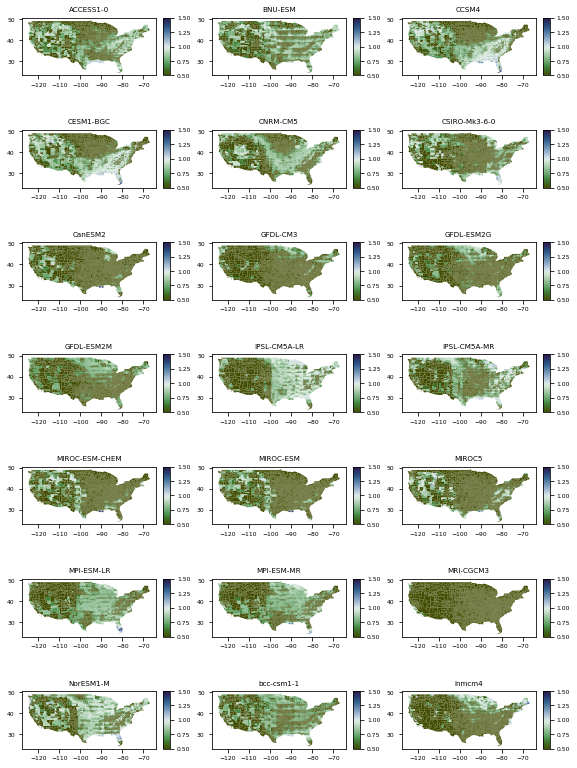

In [60]:
# GDD ratios
fig, axes = plt.subplots(7,3, figsize = (8,11))
for name,ax in zip(models,axes.flatten()):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    ax.set_title(name)
    name = name + "_RMSE_ratio"
    all_shp.loc["gdd"].plot(column = name, ax = ax, cax = cax, legend = True, cmap = cork_map, vmin=0.5, vmax=1.5)
# states.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
# coast.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
plt.tight_layout()
plt.savefig("GDD_RMSE_ratios.png",dpi=500)

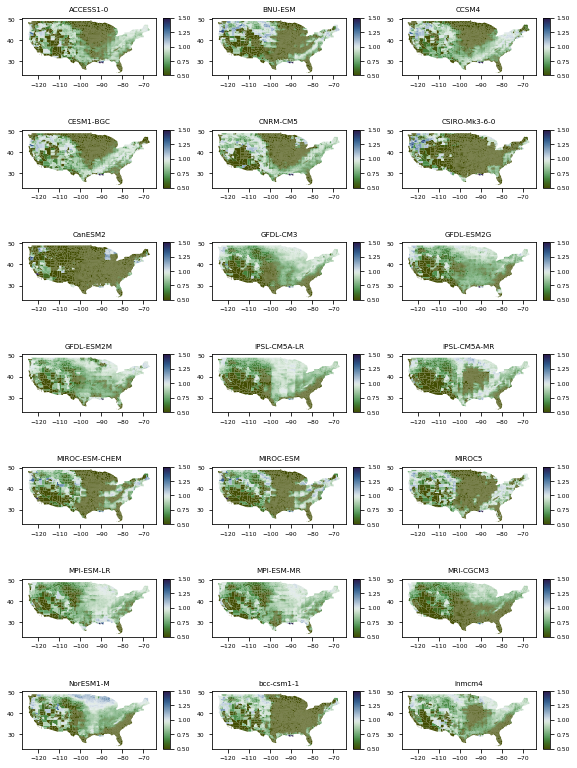

In [59]:
# eGDD ratios
fig, axes = plt.subplots(7,3, figsize = (8,11))
for name,ax in zip(models,axes.flatten()):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    ax.set_title(name)
    name = name + "_RMSE_ratio"
    all_shp.loc["egdd"].plot(column = name, ax = ax, cax = cax, legend = True, cmap = cork_map, vmin=0.5, vmax=1.5)
# states.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
# coast.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
plt.tight_layout()
plt.savefig("eGDD_RMSE_ratios.png",dpi=500)

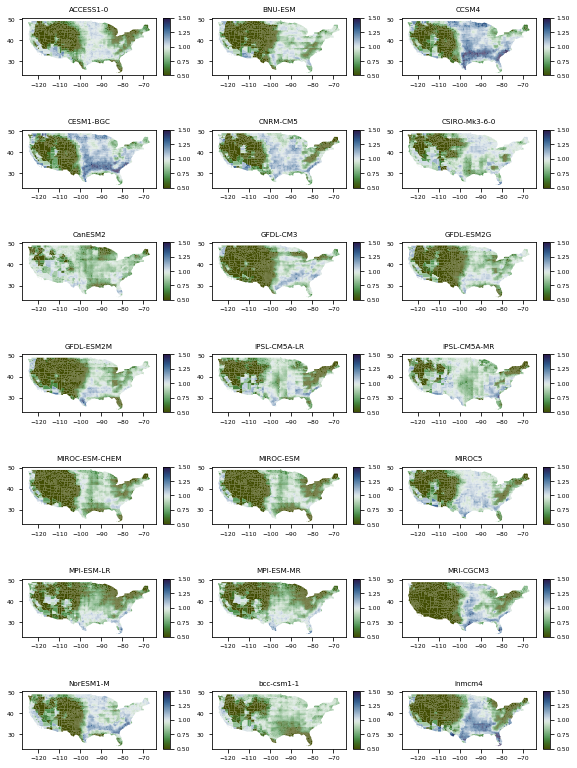

In [58]:
# Precip ratios
fig, axes = plt.subplots(7,3, figsize = (8,11))
for name,ax in zip(models,axes.flatten()):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    ax.set_title(name)
    name = name + "_RMSE_ratio"
    all_shp.loc["prcp"].plot(column = name, ax = ax, cax = cax, legend = True, cmap = cork_map, vmin=0.5, vmax=1.5)
# states.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
# coast.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
plt.tight_layout()
plt.savefig("prcp_RMSE_ratios.png",dpi=500)

# Rank histogram

In [29]:
# Get data
nex_pvals = pd.read_csv("./output/data/nex_pVals.csv")

cmip_pvals = pd.read_csv("./output/data/cmip_pVals.csv")

pvals = pd.merge(nex_pvals, cmip_pvals, on = ["AgVar", "GEOID"], suffixes = ["_NEX", "_CMIP"])
pvals["GEOID"] = pvals["GEOID"].astype(str).str.zfill(5)
pvals.set_index(["AgVar", "GEOID"], inplace = True)

In [37]:
# Merge with county shapefile
pvals = pd.merge(county, pvals.reset_index(), on = "GEOID", how = "outer", copy = False)
pvals.set_index(["AgVar", "GEOID"], inplace = True)

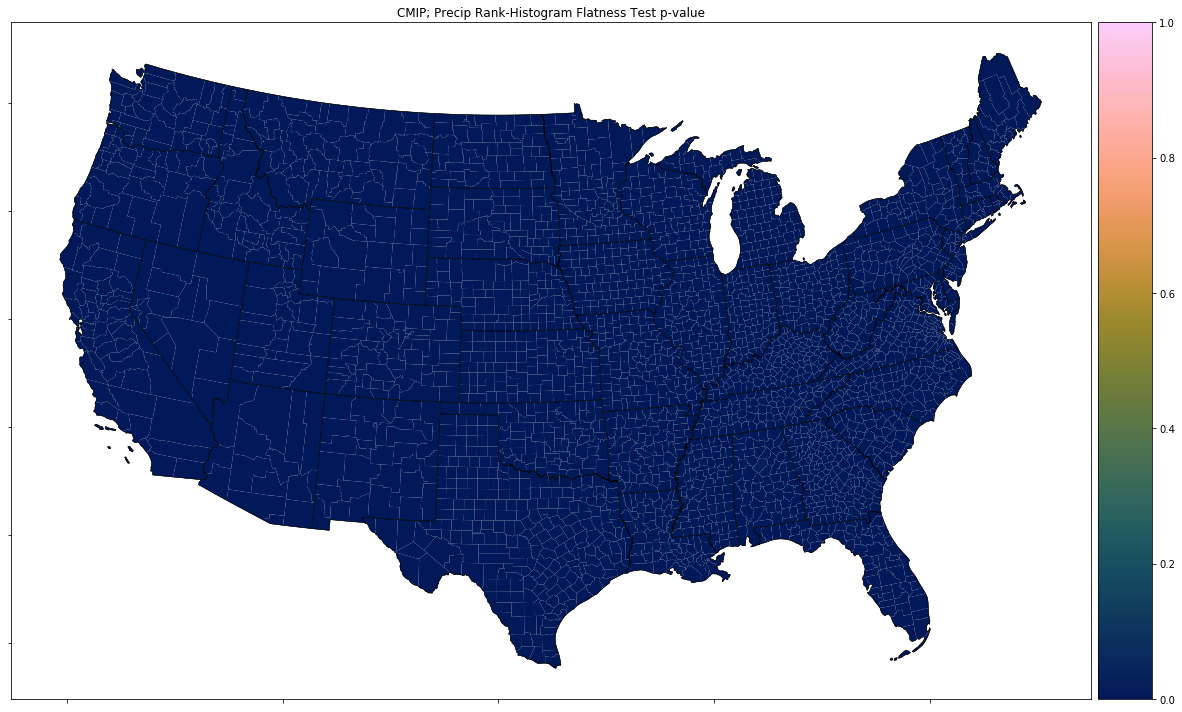

In [39]:
# CMIP example
fig, ax = plt.subplots(1,1, figsize = (18,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
pvals.query("AgVar == 'egdd'").plot(column = "pVal_CMIP", ax = ax, cax = cax, legend = True, cmap = batlow_map, vmin=0.0, vmax=1.0)
ax.tick_params(labelbottom=False, labelleft = False)
states.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
coast.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
ax.set_title("CMIP; Precip Rank-Histogram Flatness Test p-value")
plt.tight_layout()
# plt.savefig("./output/figs/cmip_prcp_rankHist.png", dpi = 500)
plt.show()

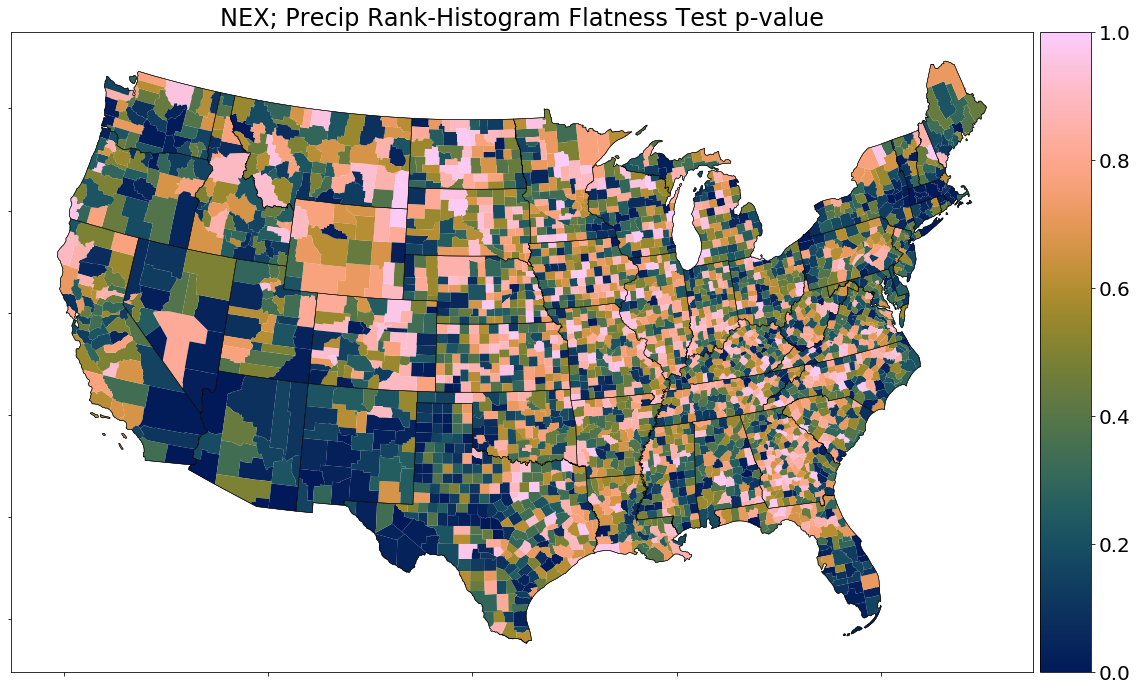

In [57]:
# NEX example
fig, ax = plt.subplots(1,1, figsize = (18,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
pvals.query("AgVar == 'prcp'").plot(column = "pVal_NEX", ax = ax, cax = cax, legend = True, cmap = batlow_map, vmin=0.0, vmax=1.0)
ax.tick_params(labelbottom=False, labelleft = False)
states.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
coast.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
ax.set_title("NEX; Precip Rank-Histogram Flatness Test p-value")
plt.tight_layout()
plt.savefig("./output/figs/nex_prcp_rankHist.png", dpi = 500)

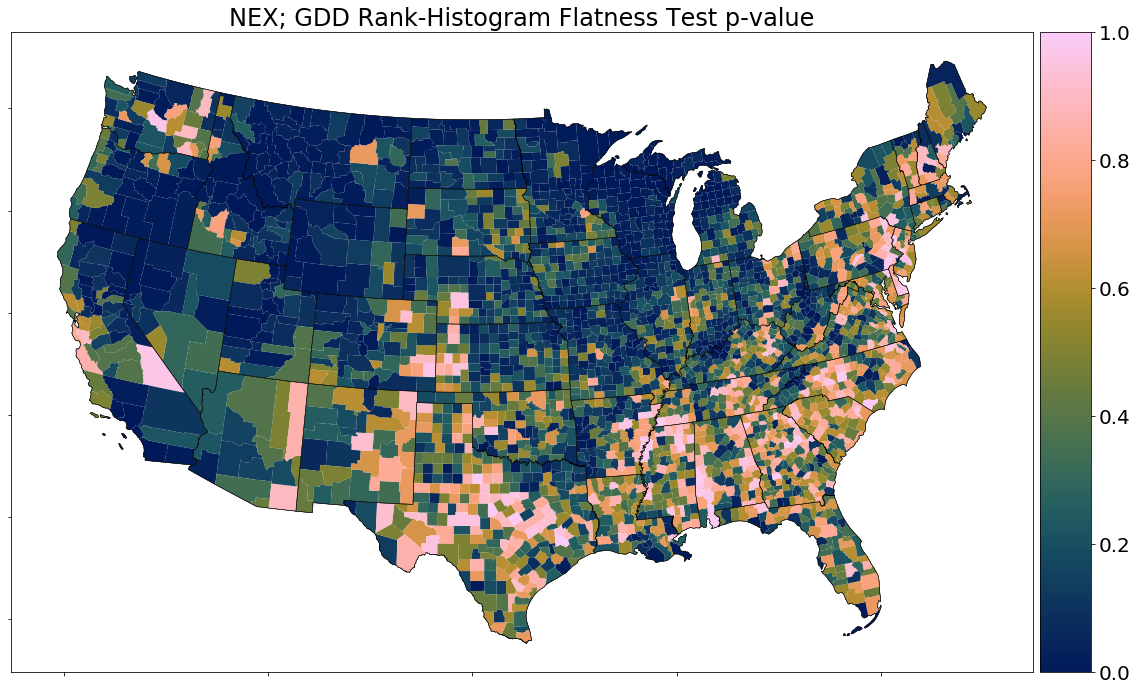

In [56]:
# NEX example
fig, ax = plt.subplots(1,1, figsize = (18,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
pvals.query("AgVar == 'gdd'").plot(column = "pVal_NEX", ax = ax, cax = cax, legend = True, cmap = batlow_map, vmin=0.0, vmax=1.0)
ax.tick_params(labelbottom=False, labelleft = False)
states.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
coast.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
ax.set_title("NEX; GDD Rank-Histogram Flatness Test p-value")
plt.tight_layout()
plt.savefig("./output/figs/nex_gdd_rankHist.png", dpi = 500)

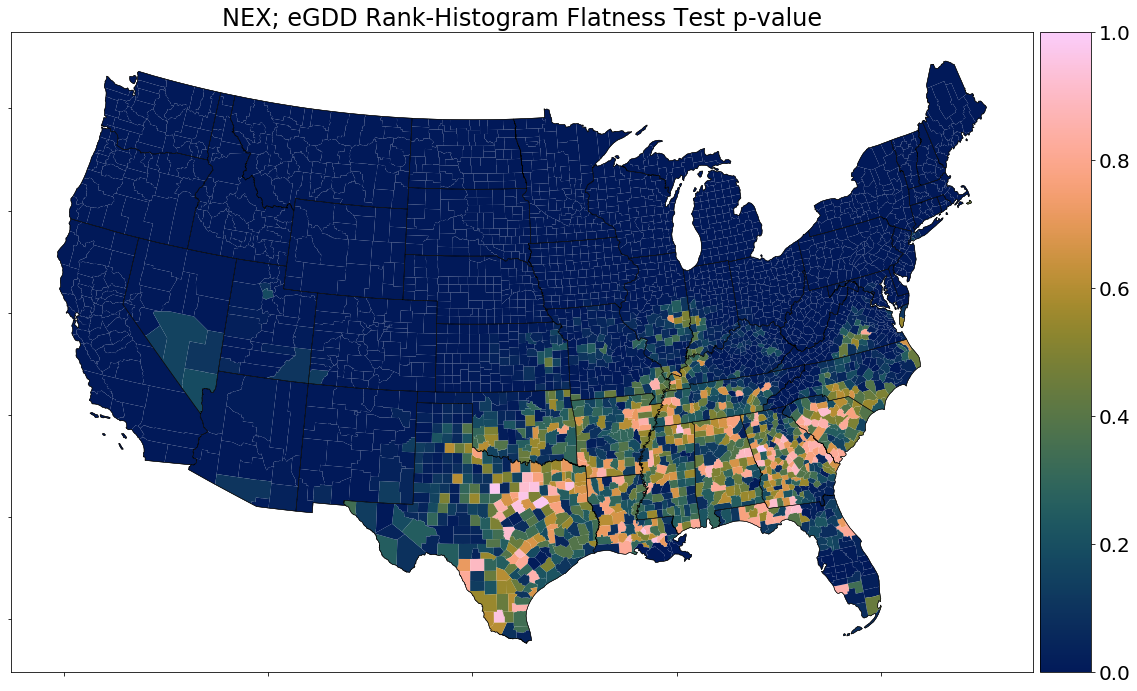

In [58]:
# NEX example
fig, ax = plt.subplots(1,1, figsize = (18,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
pvals.query("AgVar == 'egdd'").plot(column = "pVal_NEX", ax = ax, cax = cax, legend = True, cmap = batlow_map, vmin=0.0, vmax=1.0)
ax.tick_params(labelbottom=False, labelleft = False)
states.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
coast.geometry.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = "black", color = None)
ax.set_title("NEX; eGDD Rank-Histogram Flatness Test p-value")
plt.tight_layout()
plt.savefig("./output/figs/nex_egdd_rankHist.png", dpi = 500)